In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from tensorflow.keras.datasets import cifar10

In [96]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [97]:
print(x_train.shape)
x_train=x_train.reshape(3072,50000)
x_test=x_test.reshape(3072,10000)
x_train=x_train[:,:300]
x_test=x_test[:,:50]
y_train=y_train[:300]
y_test=y_test[:50]
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(50000, 32, 32, 3)
(3072, 300) (3072, 50) (300, 1) (50, 1)


In [98]:
y_train=y_train.T
print(y_train.shape)

(1, 300)


In [99]:
x_train=x_train/255
x_test=x_test/255

In [117]:
w=np.zeros((3072,1))
b=0
costs=[]
learning_rate=0.0000005
for i in range(3000):
    
    # FORWARD PROPAGATION
    a=1/(1+np.exp(-(np.dot(w.T,x_train) +b)))  
    
    # COMPUTE COST FUNCTION
    cost= -(np.dot(y_train,(np.log(a)).T) + np.dot(1-y_train,(np.log(1-a)).T))/300
    
    # BACKWARD PROPAGATION
    dw=np.dot(x_train,(a-y_train).T)/300
    db=np.sum(a-y_train)/300
    
    if (i%100==0):
        costs.append(cost)
    
    # UPDATE THE PARAMETERS
    w=w+learning_rate*dw
    b=b+learning_rate*db
    
  
        
    

Text(0, 0.5, 'COST')

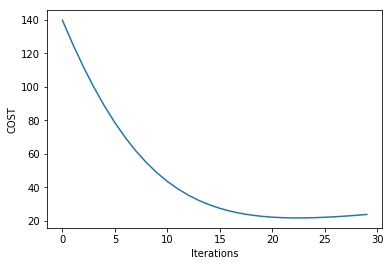

In [118]:
d={"costs": costs}
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('COST')

In [119]:
print(np.min(costs))

21.74796495864357


In [136]:
y_pred=np.zeros((1,300))
A = 1/(1+np.exp(-(np.dot(w.T,x_train)+b)))

d=A/np.max(A)

for i in range(300):
    if(d[0][i]<=0.91):
        y_pred[0][i]=0
    elif(d[0][i]>0.91 and d[0][i]<=0.92):
        y_pred[0][i]=1
    elif(d[0][i]>0.92 and d[0][i]<=0.93):
        y_pred[0][i]=2
    elif(d[0][i]>0.93 and d[0][i]<=0.94):
        y_pred[0][i]=3
    elif(d[0][i]>0.94 and d[0][i]<=0.95):
        y_pred[0][i]=4
    elif(d[0][i]>0.95 and d[0][i]<=0.96):
        y_pred[0][i]=5
    elif(d[0][i]>0.96 and d[0][i]<=0.97):
        y_pred[0][i]=6
    elif(d[0][i]>0.97 and d[0][i]<=0.98):
        y_pred[0][i]=7
    elif(d[0][i]>0.98 and d[0][i]<=0.99):
        y_pred[0][i]=8   
    elif(d[0][i]>0.99):
        y_pred[0][i]=9    

In [140]:
print(y_pred.shape)
print(np.mean(A))
print(y_train.shape)

(1, 300)
0.006115577230133047
(1, 300)


In [145]:
print("train accuracy: {} %".format(100 - np.mean(np.abs(y_pred - y_train))))
y_pred_test=np.zeros((1,50))
A = 1/(1+np.exp(-(np.dot(w.T,x_test)+b)))

d_test=A/np.max(A)

for i in range(50):
    if(d_test[0][i]<=0.91):
        y_pred_test[0][i]=0
    elif(d_test[0][i]>0.91 and d_test[0][i]<=0.92):
        y_pred_test[0][i]=1
    elif(d_test[0][i]>0.92 and d_test[0][i]<=0.93):
        y_pred_test[0][i]=2
    elif(d_test[0][i]>0.93 and d_test[0][i]<=0.94):
        y_pred_test[0][i]=3
    elif(d_test[0][i]>0.94 and d_test[0][i]<=0.95):
        y_pred_test[0][i]=4
    elif(d_test[0][i]>0.95 and d_test[0][i]<=0.96):
        y_pred_test[0][i]=5
    elif(d_test[0][i]>0.96 and d_test[0][i]<=0.97):
        y_pred_test[0][i]=6
    elif(d_test[0][i]>0.97 and d_test[0][i]<=0.98):
        y_pred_test[0][i]=7
    elif(d_test[0][i]>0.98 and d_test[0][i]<=0.99):
        y_pred_test[0][i]=8   
    elif(d_test[0][i]>0.99):
        y_pred_test[0][i]=9    

train accuracy: 96.87 %


In [147]:
print("test accuracy: {} %".format(100 - np.mean(np.abs(y_pred_test - y_test))))

test accuracy: 94.86 %
